In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,r2_score,silhouette_score,accuracy_score
plt.style.use ("dark_background")

In [ ]:
data = pd.read_csv("housePrice.csv")
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
des = data.describe()
des

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


<AxesSubplot:>

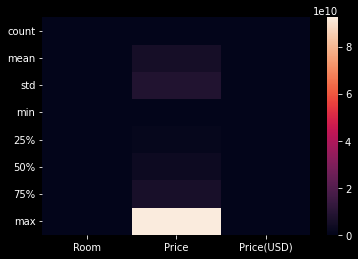

In [ ]:
sns.heatmap(des)

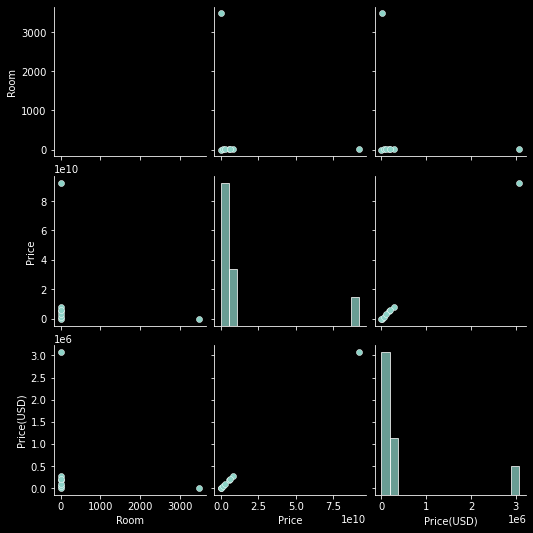

In [ ]:
sns.pairplot(des)

In [ ]:
corr = data.corr()
corr

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Room,1.000000,0.274804,0.129888,0.181707,0.567732,0.567732
Parking,0.274804,1.000000,0.432118,0.431292,0.190086,0.190086
Warehouse,0.129888,0.432118,1.000000,0.203174,0.109367,0.109367
Elevator,0.181707,0.431292,0.203174,1.000000,0.111446,0.111446
Price,0.567732,0.190086,0.109367,0.111446,1.000000,1.000000
Price(USD),0.567732,0.190086,0.109367,0.111446,1.000000,1.000000


<AxesSubplot:>

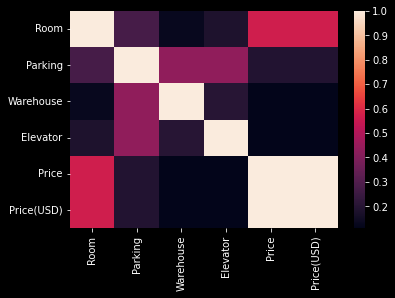

In [ ]:
sns.heatmap(corr)

<AxesSubplot:ylabel='Count'>

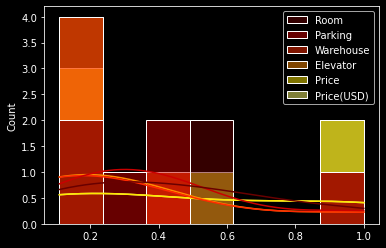

In [ ]:
sns.histplot(data=corr,kde=True,palette='hot')

In [ ]:
nan = data.isna()
nan.sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

<AxesSubplot:>

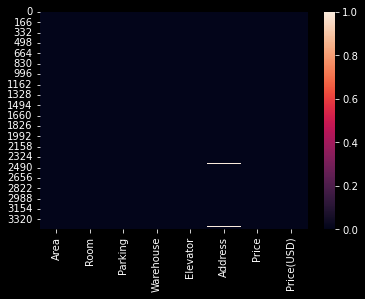

In [ ]:
sns.heatmap(nan)

<AxesSubplot:xlabel='Price(USD)', ylabel='Count'>

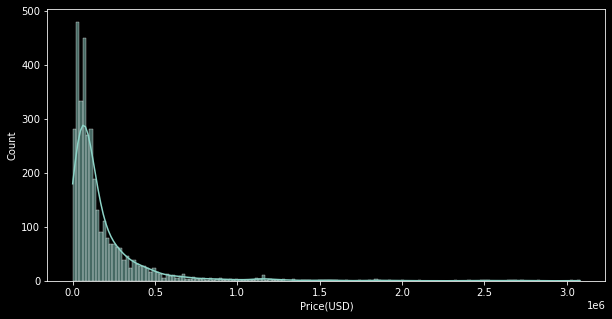

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['Price(USD)'],kde=True,palette='hot')

In [ ]:
n_unique = data.nunique()
n_unique

Area          243
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         934
Price(USD)    932
dtype: int64

In [ ]:
for x in range(3478):
    print(type(data['Area']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [ ]:
digit_list = []
not_digit_list = []
for i in data['Area']:
    if i.isdigit():
        i = int(i)
        digit_list.append(i)
        data['Area'] = pd.DataFrame(digit_list,columns = ['Area'])
    else:
        not_digit_list.append(i)

print(data['Area'])
type(data['Area'])

0        63.0
1        60.0
2        79.0
3        95.0
4       123.0
        ...  
3474      NaN
3475      NaN
3476      NaN
3477      NaN
3478      NaN
Name: Area, Length: 3479, dtype: float64


pandas.core.series.Series

In [ ]:
print(not_digit_list)
type(not_digit_list)

[' 3,310,000,000 ', ' 16,160,000,000 ', ' 1,000 ', ' 8,400,000,000 ', ' 3,600 ', ' 2,550,000,000 ']


list

In [ ]:
f = list(data['Area'])
type(f[570])
print(f)

[63.0, 60.0, 79.0, 95.0, 123.0, 70.0, 87.0, 59.0, 54.0, 71.0, 68.0, 64.0, 54.0, 136.0, 95.0, 63.0, 155.0, 64.0, 140.0, 42.0, 93.0, 87.0, 65.0, 99.0, 105.0, 160.0, 77.0, 123.0, 110.0, 100.0, 90.0, 49.0, 96.0, 67.0, 68.0, 62.0, 55.0, 110.0, 129.0, 109.0, 58.0, 55.0, 150.0, 60.0, 130.0, 88.0, 51.0, 113.0, 110.0, 60.0, 98.0, 62.0, 150.0, 75.0, 61.0, 61.0, 72.0, 100.0, 122.0, 215.0, 101.0, 67.0, 72.0, 63.0, 75.0, 109.0, 122.0, 70.0, 60.0, 53.0, 90.0, 72.0, 74.0, 88.0, 63.0, 114.0, 151.0, 42.0, 74.0, 88.0, 63.0, 114.0, 151.0, 42.0, 300.0, 110.0, 100.0, 140.0, 70.0, 60.0, 76.0, 148.0, 75.0, 40.0, 65.0, 140.0, 110.0, 70.0, 128.0, 94.0, 67.0, 75.0, 130.0, 40.0, 97.0, 110.0, 150.0, 75.0, 137.0, 85.0, 68.0, 78.0, 85.0, 100.0, 71.0, 140.0, 136.0, 48.0, 100.0, 82.0, 120.0, 139.0, 110.0, 78.0, 79.0, 66.0, 78.0, 85.0, 100.0, 80.0, 44.0, 120.0, 50.0, 121.0, 80.0, 70.0, 160.0, 40.0, 88.0, 141.0, 140.0, 120.0, 66.0, 70.0, 75.0, 70.0, 150.0, 95.0, 127.0, 123.0, 63.0, 90.0, 105.0, 180.0, 120.0, 65.0, 158.

In [ ]:
for i in range (len(not_digit_list)):
    if not_digit_list[i] in f:
        print(f.index(not_digit_list[i]))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


In [ ]:
data.isna().sum()

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [ ]:
data = data.dropna()
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3468,86.0,2,True,True,True,West Ferdows Boulevard,4.455000e+09,148500.00
3469,83.0,2,True,True,True,Mehran,4.070000e+09,135666.67
3470,75.0,2,True,True,True,Shahran,2.700000e+09,90000.00
3471,105.0,2,True,True,True,Niavaran,8.450000e+09,281666.67


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


In [ ]:
#data = data.drop([570,709,807,1604,2171,2802],axis = 0)

In [ ]:
#d = list(data['Parking'].values)
#print(d)

In [ ]:
#s = list(data['Parking'].values)
#s

In [ ]:
#Parking_list = []
#for i in range(len(data['Parking'])):
#    if s[i] == True:
#        s[i] = 1
#    else:
#        s[i] = 0

In [ ]:
#print(s)

In [ ]:
#var = pd.DataFrame(s,columns = ['Parking'])
#var

In [ ]:
#data = data.drop(['Parking'],axis = 1)
#data

In [ ]:
LE = LabelEncoder()
data['Parking'] = LE.fit_transform(data['Parking'])
data['Warehouse'] = LE.fit_transform(data['Warehouse'])
data['Elevator'] = LE.fit_transform(data['Elevator'])
data['Address'] = LE.fit_transform(data['Address'])
data

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14784\2411867286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parking'] = LE.fit_transform(data['Parking'])
C:\Users\mahmo\AppData\Local\Temp\ipykernel_14784\2411867286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Warehouse'] = LE.fit_transform(data['Warehouse'])
C:\Users\mahmo\AppData\Local\Temp\ipykernel_14784\2411867286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3468,86.0,2,1,1,1,183,4.455000e+09,148500.00
3469,83.0,2,1,1,1,96,4.070000e+09,135666.67
3470,75.0,2,1,1,1,156,2.700000e+09,90000.00
3471,105.0,2,1,1,1,105,8.450000e+09,281666.67


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   int64  
 3   Warehouse   3450 non-null   int64  
 4   Elevator    3450 non-null   int64  
 5   Address     3450 non-null   int32  
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 229.1 KB


<BarContainer object of 3450 artists>

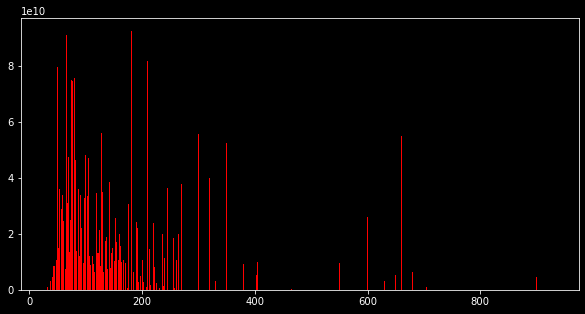

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data['Area'],data['Price'],color='red')

In [ ]:
head = data.head()
head

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33


In [ ]:
price = list(head['Price(USD)'])
Area = list(head['Area'])

([<matplotlib.patches.Wedge at 0x27169883ee0>,
 [Text(-0.5062499637934439, 0.9765812685891211, '63.0'),
  Text(-1.0898364697188638, 0.14918602237047632, '60.0'),
  Text(-0.9734545910589444, -0.5122364289527477, '79.0'),
  Text(-0.7177790173800096, -0.8335426097140974, '95.0'),
  Text(1.0687842085326633, -0.2601928430822199, '123.0')],
 [Text(-0.276136343887333, 0.5326806919577023, '15%'),
  Text(-0.5944562562102893, 0.08137419402025979, '15%'),
  Text(-0.5309752314866969, -0.27940168851968056, '5%'),
  Text(-0.39151582766182336, -0.45465960529859856, '7%'),
  Text(0.5829732046541799, -0.14192336895393812, '58%')])

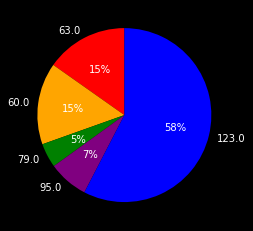

In [ ]:
plt.pie(price,labels=Area,labeldistance = 1.1,startangle = 90,colors = ['red','orange','green','purple','blue'],autopct = '%1.0f%%')

<AxesSubplot:>

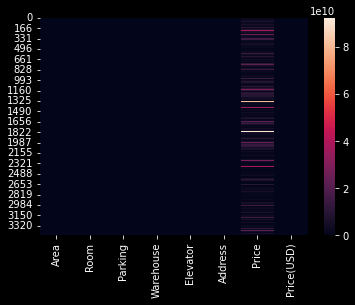

In [ ]:
sns.heatmap(data)

In [ ]:
data = np.array(data)

In [ ]:
data

array([[6.3000000e+01, 1.0000000e+00, 1.0000000e+00, ..., 1.5600000e+02,
        1.8500000e+09, 6.1666670e+04],
       [6.0000000e+01, 1.0000000e+00, 1.0000000e+00, ..., 1.5600000e+02,
        1.8500000e+09, 6.1666670e+04],
       [7.9000000e+01, 2.0000000e+00, 1.0000000e+00, ..., 1.1700000e+02,
        5.5000000e+08, 1.8333330e+04],
       ...,
       [7.5000000e+01, 2.0000000e+00, 1.0000000e+00, ..., 1.5600000e+02,
        2.7000000e+09, 9.0000000e+04],
       [1.0500000e+02, 2.0000000e+00, 1.0000000e+00, ..., 1.0500000e+02,
        8.4500000e+09, 2.8166667e+05],
       [8.2000000e+01, 3.0000000e+00, 1.0000000e+00, ..., 1.1100000e+02,
        3.1700000e+09, 1.0566667e+05]])

In [ ]:
SC = StandardScaler()
data[:,0:1] = SC.fit_transform(data[:,0:1])
data[:,5:-1] = SC.fit_transform(data[:,5:-1])
data

array([[-6.30964599e-01,  1.00000000e+00,  1.00000000e+00, ...,
         1.01380477e+00, -4.34872531e-01,  6.16666700e+04],
       [-6.74101991e-01,  1.00000000e+00,  1.00000000e+00, ...,
         1.01380477e+00, -4.34872531e-01,  6.16666700e+04],
       [-4.00898505e-01,  2.00000000e+00,  1.00000000e+00, ...,
         2.38951854e-01, -5.94845033e-01,  1.83333300e+04],
       ...,
       [-4.58415028e-01,  2.00000000e+00,  1.00000000e+00, ...,
         1.01380477e+00, -3.30275126e-01,  9.00000000e+04],
       [-2.70411018e-02,  2.00000000e+00,  1.00000000e+00, ...,
         5.35572806e-04,  3.77295556e-01,  2.81666670e+05],
       [-3.57761112e-01,  3.00000000e+00,  1.00000000e+00, ...,
         1.19743713e-01, -2.72438914e-01,  1.05666670e+05]])

In [ ]:
data = pd.DataFrame(data,columns = ['Area','Room','Parking','Warehouse','Elevator','Address','Price','Price(USD)'])
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,-0.630965,1.0,1.0,1.0,1.0,1.013805,-0.434873,61666.67
1,-0.674102,1.0,1.0,1.0,1.0,1.013805,-0.434873,61666.67
2,-0.400899,2.0,1.0,1.0,1.0,0.238952,-0.594845,18333.33
3,-0.170832,2.0,1.0,1.0,1.0,0.934333,-0.551468,30083.33
4,0.231783,2.0,1.0,1.0,1.0,0.894597,0.198865,233333.33
...,...,...,...,...,...,...,...,...
3445,-0.300245,2.0,1.0,1.0,1.0,1.550241,-0.114312,148500.00
3446,-0.343382,2.0,1.0,1.0,1.0,-0.178277,-0.161689,135666.67
3447,-0.458415,2.0,1.0,1.0,1.0,1.013805,-0.330275,90000.00
3448,-0.027041,2.0,1.0,1.0,1.0,0.000536,0.377296,281666.67


In [ ]:
x = data.iloc[:,:-1]
x

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,-0.630965,1.0,1.0,1.0,1.0,1.013805,-0.434873
1,-0.674102,1.0,1.0,1.0,1.0,1.013805,-0.434873
2,-0.400899,2.0,1.0,1.0,1.0,0.238952,-0.594845
3,-0.170832,2.0,1.0,1.0,1.0,0.934333,-0.551468
4,0.231783,2.0,1.0,1.0,1.0,0.894597,0.198865
...,...,...,...,...,...,...,...
3445,-0.300245,2.0,1.0,1.0,1.0,1.550241,-0.114312
3446,-0.343382,2.0,1.0,1.0,1.0,-0.178277,-0.161689
3447,-0.458415,2.0,1.0,1.0,1.0,1.013805,-0.330275
3448,-0.027041,2.0,1.0,1.0,1.0,0.000536,0.377296


<AxesSubplot:>

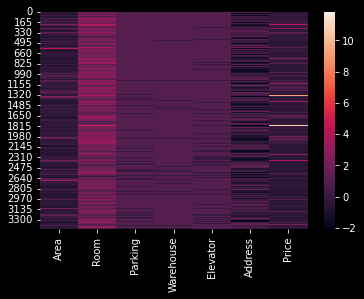

In [ ]:
sns.heatmap(x)

In [ ]:
x = np.array(x)
x

array([[-6.30964599e-01,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.01380477e+00, -4.34872531e-01],
       [-6.74101991e-01,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.01380477e+00, -4.34872531e-01],
       [-4.00898505e-01,  2.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  2.38951854e-01, -5.94845033e-01],
       ...,
       [-4.58415028e-01,  2.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.01380477e+00, -3.30275126e-01],
       [-2.70411018e-02,  2.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  5.35572806e-04,  3.77295556e-01],
       [-3.57761112e-01,  3.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.19743713e-01, -2.72438914e-01]])

In [ ]:
y = data.iloc[:,-1].values
y

array([ 61666.67,  61666.67,  18333.33, ...,  90000.  , 281666.67,
       105666.67])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split ( x , y , test_size = 0.2 , random_state = 0)

In [ ]:
pca = PCA()
x = pca.fit_transform(x)

In [ ]:
x

array([[-1.33041998,  0.72430705,  0.04528918, ..., -0.52639964,
        -0.05010755,  0.02146219],
       [-1.35026346,  0.72798683,  0.00716446, ..., -0.52624065,
        -0.05015336,  0.02140055],
       [-0.68411689,  0.09993919, -0.08817646, ..., -0.22832552,
        -0.0109474 , -0.00965831],
       ...,
       [-0.72435541,  0.90559214, -0.05474218, ..., -0.20896217,
        -0.01542458, -0.00697109],
       [ 0.24269477,  0.11921655, -0.14704529, ..., -0.3126764 ,
         0.0037052 , -0.00636663],
       [ 0.04871293,  0.24208312, -0.40470355, ...,  0.06772915,
         0.02744206, -0.03781691]])

<AxesSubplot:>

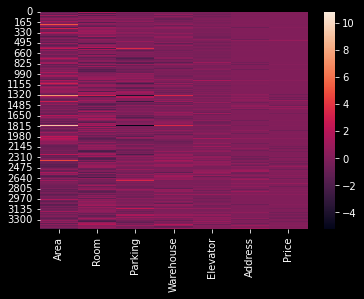

In [ ]:
sns.heatmap(pd.DataFrame(x,columns = ['Area','Room','Parking','Warehouse','Elevator','Address','Price']))

In [ ]:
LE = LinearRegression()
LE.fit(x_train,y_train)
y_pred = LE.predict(x_test)
print(y_pred)

[1.40000000e+05 2.30000001e+04 1.16666673e+04 2.96666667e+04
 5.39999998e+04 5.23333334e+04 3.49666667e+05 6.50000001e+04
 6.83333332e+04 1.78333334e+04 1.53333334e+04 4.50000000e+05
 8.00000000e+04 2.80000000e+05 2.16666668e+04 6.66666667e+04
 1.38333333e+05 2.10000000e+04 7.33333335e+04 1.73333333e+05
 1.93333333e+05 3.13333333e+05 2.90000000e+05 2.50000000e+05
 2.90000001e+04 4.25000002e+04 2.82500000e+05 8.16666669e+04
 7.40000001e+04 3.50000000e+05 1.01666667e+05 1.70000000e+05
 6.33333333e+04 7.40000000e+04 7.83333333e+04 1.29333333e+05
 1.16666667e+05 6.66666667e+04 5.16666665e+04 2.16666667e+04
 8.50000000e+04 7.50000004e+04 5.83333334e+04 4.82800000e+05
 8.00000001e+04 1.93333339e+04 1.14000000e+05 1.13333333e+05
 1.79666668e+04 1.25333333e+05 1.13333333e+05 5.66666667e+04
 2.16666669e+04 3.66666667e+05 4.11666667e+05 2.23333333e+05
 1.25000000e+04 1.10000000e+05 1.50666667e+05 2.06666667e+05
 1.50000000e+05 1.53333335e+04 1.05000000e+05 9.93333333e+04
 4.66666667e+05 5.500000

In [ ]:
print(r2_score(y_test,y_pred))

0.9999999999999999


In [ ]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,140000.00,139999.999908
1,23000.00,23000.000062
2,11666.67,11666.667256
3,29666.67,29666.666742
4,54000.00,53999.999789
...,...,...
685,150000.00,150000.000111
686,79000.00,79000.000155
687,90000.00,90000.000064
688,98333.33,98333.333168


In [ ]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred = RFR.predict(x_test)
print(y_pred)

[1.40013333e+05 2.29946666e+04 1.16803364e+04 2.96666697e+04
 5.39723329e+04 5.24140006e+04 3.49095998e+05 6.50000000e+04
 6.83413300e+04 1.78549974e+04 1.53099990e+04 4.49933333e+05
 8.00000000e+04 2.79896666e+05 2.16666700e+04 6.66666700e+04
 1.38235998e+05 2.09733331e+04 7.33333300e+04 1.73326663e+05
 1.93306664e+05 3.12970000e+05 2.90010000e+05 2.49991333e+05
 2.89941665e+04 4.24349994e+04 2.83316663e+05 8.16666700e+04
 7.40366671e+04 3.49928000e+05 1.01630003e+05 1.70000000e+05
 6.33333300e+04 7.40366671e+04 7.83333303e+04 1.29296664e+05
 1.16666670e+05 6.66666700e+04 5.16940026e+04 2.16666700e+04
 8.50733333e+04 7.50000000e+04 5.83333300e+04 4.83666663e+05
 8.00000000e+04 1.93399969e+04 1.13516667e+05 1.13346664e+05
 1.79950000e+04 1.25183331e+05 1.13333330e+05 5.66633366e+04
 2.16700033e+04 3.66666670e+05 4.11508334e+05 2.23353330e+05
 1.24749996e+04 1.10000000e+05 1.50763335e+05 2.06666670e+05
 1.50000000e+05 1.52966658e+04 1.04980000e+05 9.92999973e+04
 4.66433336e+05 5.499600

In [ ]:
print(r2_score(y_test,y_pred))

0.9996112150185997


In [ ]:
import pickle
pickle.dump(RFR, open('House Price Prediction.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('House Price Prediction.pkl', 'rb'))

In [ ]:
pickled_model.predict(x_test)

array([1.40013333e+05, 2.29946666e+04, 1.16803364e+04, 2.96666697e+04,
       5.39723329e+04, 5.24140006e+04, 3.49095998e+05, 6.50000000e+04,
       6.83413300e+04, 1.78549974e+04, 1.53099990e+04, 4.49933333e+05,
       8.00000000e+04, 2.79896666e+05, 2.16666700e+04, 6.66666700e+04,
       1.38235998e+05, 2.09733331e+04, 7.33333300e+04, 1.73326663e+05,
       1.93306664e+05, 3.12970000e+05, 2.90010000e+05, 2.49991333e+05,
       2.89941665e+04, 4.24349994e+04, 2.83316663e+05, 8.16666700e+04,
       7.40366671e+04, 3.49928000e+05, 1.01630003e+05, 1.70000000e+05,
       6.33333300e+04, 7.40366671e+04, 7.83333303e+04, 1.29296664e+05,
       1.16666670e+05, 6.66666700e+04, 5.16940026e+04, 2.16666700e+04,
       8.50733333e+04, 7.50000000e+04, 5.83333300e+04, 4.83666663e+05,
       8.00000000e+04, 1.93399969e+04, 1.13516667e+05, 1.13346664e+05,
       1.79950000e+04, 1.25183331e+05, 1.13333330e+05, 5.66633366e+04,
       2.16700033e+04, 3.66666670e+05, 4.11508334e+05, 2.23353330e+05,
      